*   Multimídia - Imagem I (Exercício 2)

*   Felipe Daniel Dias dos Santos - 11711ECP004

*   Graduação em Engenharia de Computação - Faculdade de Engenharia Elétrica - Universidade Federal de Uberlândia

In [ ]:
#Função que recebe a matriz de uma imagem, assim como o número de linhas e colunas da mesma, e retorna uma matriz de matização.
def matizacao(pixel, n_rows, n_columns):

  #Definição da matriz de matização de ordem 4
  mat = np.matrix('0 8 2 10; 12 4 14 6; 3 11 1 9; 15 7 13 5')

  #Matriz de saída
  out = np.empty((n_rows, n_columns))

  #Laço que percorre todos os pixels da imagem, aplicando o algoritmo de matização para cada um deles
  for i in range(n_rows):

    for j in range(n_columns):

      #Converter o pixel do intervalo (0 - 255) para o intervalo (0 - 16)
      out[i, j] = round((pixel[i, j] / 255) * 16, 0)

      x = i % 4
      y = j % 4

      if out[i, j] > mat[x, y]:

        out[i, j] = 1

      else:

        out[i, j] = 0
  
  return out

In [ ]:
#Função que normaliza uma matriz resultante de um processo de matização, multiplicando seu resultado por 255.
#Dessa forma, o resultado que antes era 0, permanece 0 e, aquele que antes era 1, se torna 255.
def norm(out, n_rows, n_columns):

  #Laço que analisa todos os pixels e os transfere de 0 para 0 e de 1 para 255
  for i in range(n_rows):

    for j in range(n_columns):

      out[i, j] = out[i, j] * 255

  return out

In [ ]:
#Função que realiza a separação dos canais RGB de uma imagem.
#A função recebe a matriz de pixels da imagem, seu número de linhas, seu número de colunas e retorna três matrizes de mesma ordem, uma para cada canal.
def getRGB(pixel, n_rows, n_columns):

  R = np.empty((n_rows, n_columns))
  G = np.empty((n_rows, n_columns))
  B = np.empty((n_rows, n_columns))

  #Laço que percorre a matriz da imagem, pixel por pixel, e extrai o valor de cada um de seus canais
  for i in range(n_rows):

    for j in range(n_columns):

      #As matrizes RGB são preenchidas por cada um dos três valores contidos em cada pixel da imagem
      R[i, j] = pixel[i, j][0]
      G[i, j] = pixel[i, j][1]
      B[i, j] = pixel[i, j][2]

  return R, G, B

In [ ]:
#Função que realiza a matização de um canal de acordo com o algoritmo de Floyd Steinberg
def floydSteinberg(M, n_rows, n_columns):

  for i in range(0, n_rows - 1):

    for j in range(1, n_columns - 1):
    
      old_pixel = M[i, j]
      new_pixel = round(old_pixel / 256)
      M[i, j] = new_pixel
      quant_error = old_pixel - new_pixel
      M[i + 1, j] = M[i + 1, j] + quant_error * 7 / 16
      M[i - 1, j + 1] = M[i - 1, j + 1] + quant_error * 3 / 16
      M[i, j + 1] = M[i, j + 1] + quant_error * 5 / 16
      M[i + 1, j + 1] = M[i + 1, j + 1] + quant_error * 1 / 16
  
  return M

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


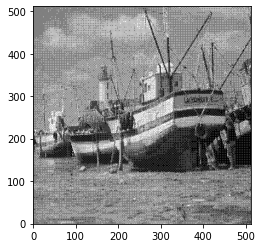

In [ ]:
#a.1) Matização de imagens em tons de cinza: primeira imagem
from google.colab import drive
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/Colab Notebooks/dados/'

#Obtenção da imagem
im = Image.open(root_path + 'boat.tiff')

#Obtenção da matriz de pixels da imagem
pixel = im.load()

#Obtenção das dimensões da imagem
n_rows, n_columns = im.size

#Realização do processo de matização
out = matizacao(pixel, n_rows, n_columns)

#Normalização da imagem, retornando a matriz resultante do processo anterior para o intervalo (0 - 255)
final = norm(out, n_rows, n_columns)

#Mostrar a imagem resultante
plt.imshow(np.rot90(final), 'gray', origin = 'lower')
plt.show()

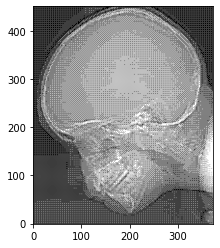

In [ ]:
#a.2) Matização de imagens em tons de cinza: segunda imagem
im = Image.open(root_path + 'ctskull.tif')

pixel = im.load()
n_rows, n_columns = im.size

out = matizacao(pixel, n_rows, n_columns)
final = norm(out, n_rows, n_columns)

plt.imshow(np.rot90(final), 'gray', origin = 'lower')
plt.show()

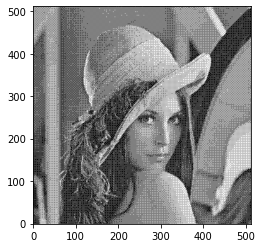

In [ ]:
#a.3) Matização de imagens em tons de cinza: terceira imagem
im = Image.open(root_path + 'lena.tiff')

pixel = im.load()
n_rows, n_columns = im.size

out = matizacao(pixel, n_rows, n_columns)
final = norm(out, n_rows, n_columns)

plt.imshow(np.rot90(final), 'gray', origin = 'lower')
plt.show()

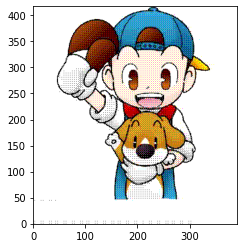

In [ ]:
#b.1) Matização de imagens coloridas: primeira imagem
im = Image.open(root_path + 'd1.jpg')

#Obtenção da matriz de pixels da imagem
pixel = im.load()

#Obtenção das dimensões da imagem
n_rows, n_columns = im.size

#Obtenção das matrizes R, G e B
R, G, B = getRGB(pixel, n_rows, n_columns)

#Realização do processo de matização em cada canal
out_R = matizacao(R, n_rows, n_columns)
out_G = matizacao(G, n_rows, n_columns)
out_B = matizacao(B, n_rows, n_columns)

#Normalização das matrizes obtidas anteriormente
final_R = norm(out_R, n_rows, n_columns)
final_G = norm(out_G, n_rows, n_columns)
final_B = norm(out_B, n_rows, n_columns)

#Vetor de matrizes de três posições, onde cada posição armazena uma matriz, referente a cada canal
#Isto é, o seguinte comando realiza uma junção dos canais que foi separado anteriormente, para reaver a imagem com as modificações realizadas
RGB_array = np.empty((n_rows, n_columns, 3), 'uint8')

#Preenchimento do vetor com as matrizes finais obtidas após o processo de matização e normalização
RGB_array[..., 0] = final_R
RGB_array[..., 1] = final_G
RGB_array[..., 2] = final_B

#Transformar o vetor de matrizes em uma imagem de três canais (RGB)
final = Image.fromarray(RGB_array)

#Mostrar a imagem modificada
plt.imshow(np.rot90(final), 'gray', origin = 'lower')
plt.show()

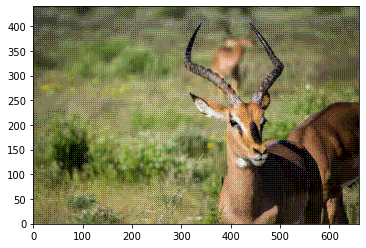

In [ ]:
#b.2) Matização de imagens coloridas: segunda imagem
im = Image.open(root_path + 'h1.jpg')

pixel = im.load()
n_rows, n_columns = im.size

R, G, B = getRGB(pixel, n_rows, n_columns)

out_R = matizacao(R, n_rows, n_columns)
out_G = matizacao(G, n_rows, n_columns)
out_B = matizacao(B, n_rows, n_columns)

final_R = norm(out_R, n_rows, n_columns)
final_G = norm(out_G, n_rows, n_columns)
final_B = norm(out_B, n_rows, n_columns)

RGB_array = np.empty((n_rows, n_columns, 3), 'uint8')

RGB_array[..., 0] = final_R
RGB_array[..., 1] = final_G
RGB_array[..., 2] = final_B

final = Image.fromarray(RGB_array)

plt.imshow(np.rot90(final),'gray', origin = 'lower')
plt.show()

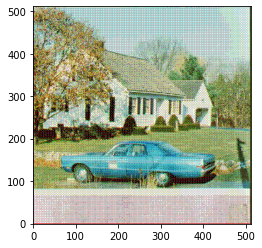

In [ ]:
#b.3) Matização de imagens coloridas: terceira imagem
im = Image.open(root_path + 'house.tiff')

pixel = im.load()
n_rows, n_columns = im.size

R, G, B = getRGB(pixel, n_rows, n_columns)

out_R = matizacao(R, n_rows, n_columns)
out_G = matizacao(G, n_rows, n_columns)
out_B = matizacao(B, n_rows, n_columns)

final_R = norm(out_R, n_rows, n_columns)
final_G = norm(out_G, n_rows, n_columns)
final_B = norm(out_B, n_rows, n_columns)

RGB_array = np.empty((n_rows, n_columns, 3), 'uint8')

RGB_array[..., 0] = final_R
RGB_array[..., 1] = final_G
RGB_array[..., 2] = final_B

final = Image.fromarray(RGB_array)

plt.imshow(np.rot90(final),'gray', origin = 'lower')
plt.show()

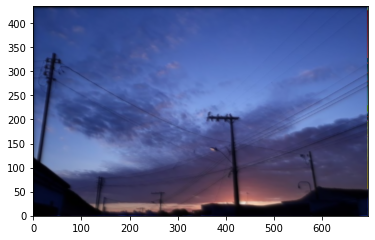

In [ ]:
#c)Matização de imagem colorida por Algoritmo de Floyd-Steinberg

#Obtenção da imagem
im = Image.open(root_path + 'h3.jpg')

#Obtenção da matriz de pixels da imagem
pixel = im.load()

#Dimensões da imagem
n_rows, n_columns = im.size

#Obtenção dos canais RGB
R, G, B = getRGB(pixel, n_rows, n_columns)

#Junções dos canais em uma imagem
R = floydSteinberg(R, n_rows, n_columns)
G = floydSteinberg(G, n_rows, n_columns)
B = floydSteinberg(B, n_rows, n_columns)

RGB_array = np.empty((n_rows, n_columns, 3), 'uint8')

RGB_array[..., 0] = R
RGB_array[..., 1] = G
RGB_array[..., 2] = B

#Mostrar imagem resultante do processo
final = Image.fromarray(RGB_array)

plt.imshow(np.rot90(final),'gray', origin = 'lower')
plt.show()